In [2]:
from datascience import *
import numpy as np
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from scipy import stats
from scipy.stats import norm

In [3]:
import matplotlib
matplotlib.__version__

'2.2.2'

In [4]:

import seaborn as sns
sns.set(color_codes = True)


In [5]:
#Data or Fe-based, Cuprates, Hydrides
#There were no high T hydrides in the original data set 
features8 = pd.read_csv("https://raw.githubusercontent.com/9161AD/superconduct-/master/features_H_Cu_Fe2.csv")
features8

,Unnamed: 0,material_name,critical_temp,number_of_elements,wtd_gmean_atomic_mass,wtd_gmean_fie,wtd_gmean_atomic_radius,wtd_gmean_Density,wtd_gmean_ElectronAffinity,wtd_gmean_FusionHeat,wtd_gmean_ThermalConductivity,wtd_gmean_Valence
0,20573,H2S1,185.000,2,3.193745,1197.631481,62.520676,2.511454,103.613790,0.813651,0.188323,1.817121
1,3985,Hg0.66Pb0.34Ba2Ca1.98Cu2.9O8.4,143.000,6,34.814175,934.741621,91.656481,72.402056,54.820167,1.302412,1.426268,2.029163
2,5200,Hg0.7Pb0.3Ba2Ca2Cu3O8,143.000,6,35.634607,925.775437,93.530228,82.661372,53.184517,1.381810,1.636298,2.026163
3,19039,Tl0.8Hg0.2Ba2Ca2Cu3O9,137.400,6,34.005520,927.055095,89.709076,64.905202,60.272812,1.260402,1.356990,2.038528
4,5476,Hg0.75Ba2.07Ca2.07Cu3.11O8.208,135.800,5,34.675999,928.979515,93.016742,77.320991,53.047373,1.362431,1.578244,2.000000
5,7105,Hg1Ba2Ca2Cu3O8,135.700,5,35.612951,931.716637,93.714039,82.935956,50.092380,1.362928,1.592736,2.000000
6,4709,Hg1Ba2Ca2Cu3O8,135.500,5,35.612951,931.716637,93.714039,82.935956,50.092380,1.362928,1.592736,2.000000
7,5475,Hg0.75Ba2.07Ca2.07Cu3.11O8.187,135.400,5,34.710813,928.562538,93.096612,77.722371,52.979411,1.365642,1.586629,2.000000
8,7124,Hg1Ba2Ca2Cu3O8.27,135.000,5,35.143187,937.036981,92.679305,77.530779,50.969045,1.322496,1.488144,2.000000
9,7787,Hg1Ba2Ca2Cu3O8.29,135.000,5,35.109252,937.425248,92.604470,77.151556,51.033422,1.319601,1.480808,2.000000


In [6]:
len(features8)

1586

In [7]:
# We Remove the one outlier that contains Hg but no Cu to isolate the Hydrides
#Already determined All Fe based SCs contain Cu 
features_Hydrides1 = features8[~features8.material_name.str.contains("Cu")]
features_Hydrides2 = features_Hydrides1[~features_Hydrides1.material_name.str.contains("Hg")]
features_Hydrides3 = features_Hydrides2[~features_Hydrides2.material_name.str.contains("Hf")]
features_Hydrides4 = features_Hydrides3[~features_Hydrides3.material_name.str.contains("Hs")]
features_Hydrides5 = features_Hydrides4[~features_Hydrides4.material_name.str.contains("Ho")]
features_Hydrides6 = features_Hydrides5[~features_Hydrides5.material_name.str.contains("Fe")]

features_Hydrides6.head()


,Unnamed: 0,material_name,critical_temp,number_of_elements,wtd_gmean_atomic_mass,wtd_gmean_fie,wtd_gmean_atomic_radius,wtd_gmean_Density,wtd_gmean_ElectronAffinity,wtd_gmean_FusionHeat,wtd_gmean_ThermalConductivity,wtd_gmean_Valence
0,20573,H2S1,185.0,2,3.193745,1197.631481,62.520676,2.511454,103.613790,0.813651,0.188323,1.817121
164,20064,H1W1O3,120.0,3,14.998131,1179.732083,64.671268,5.503734,111.484165,0.734433,0.224967,2.168944
190,14218,H1Br3C61,115.0,3,12.618189,1091.401692,67.810310,1962.792703,158.992903,84.751154,91.226388,3.956128
558,14219,H1Cl3C61,80.0,3,12.153703,1096.160884,67.268397,1428.919880,159.523281,82.456538,80.905169,3.956128
745,20572,H2S1,60.0,2,3.193745,1197.631481,62.520676,2.511454,103.613790,0.813651,0.188323,1.817121


In [8]:
#Hydrides Groups
Hydrides = features_Hydrides6.assign(Group='Hydride')[['Group'] + features_Hydrides6.columns.tolist()]
Hydrides = Hydrides.drop(Hydrides.columns[1], axis=1)
Hydrides.head()


,Group,material_name,critical_temp,number_of_elements,wtd_gmean_atomic_mass,wtd_gmean_fie,wtd_gmean_atomic_radius,wtd_gmean_Density,wtd_gmean_ElectronAffinity,wtd_gmean_FusionHeat,wtd_gmean_ThermalConductivity,wtd_gmean_Valence
0,Hydride,H2S1,185.0,2,3.193745,1197.631481,62.520676,2.511454,103.613790,0.813651,0.188323,1.817121
164,Hydride,H1W1O3,120.0,3,14.998131,1179.732083,64.671268,5.503734,111.484165,0.734433,0.224967,2.168944
190,Hydride,H1Br3C61,115.0,3,12.618189,1091.401692,67.810310,1962.792703,158.992903,84.751154,91.226388,3.956128
558,Hydride,H1Cl3C61,80.0,3,12.153703,1096.160884,67.268397,1428.919880,159.523281,82.456538,80.905169,3.956128
745,Hydride,H2S1,60.0,2,3.193745,1197.631481,62.520676,2.511454,103.613790,0.813651,0.188323,1.817121


In [9]:
len(Hydrides)


145

In [10]:
(len(Hydrides)/len(features8)) * 100 
#9% Hydrides

9.14249684741488

In [11]:
#Cuprate Groups --> Isolating Fe then picking out Cu
features_Cuprates1 = features8[~features8.material_name.str.contains("Fe")]
features_Cuprates2 = features_Cuprates1[features_Cuprates1.material_name.str.contains("Cu")]



In [12]:
#Cuprates Groups
Cuprates = features_Cuprates2.assign(Group='Cuprate')[['Group'] + features_Cuprates2.columns.tolist()]
Cuprates = Cuprates.drop(Cuprates.columns[1], axis=1)
Cuprates.head()

,Group,material_name,critical_temp,number_of_elements,wtd_gmean_atomic_mass,wtd_gmean_fie,wtd_gmean_atomic_radius,wtd_gmean_Density,wtd_gmean_ElectronAffinity,wtd_gmean_FusionHeat,wtd_gmean_ThermalConductivity,wtd_gmean_Valence
1,Cuprate,Hg0.66Pb0.34Ba2Ca1.98Cu2.9O8.4,143.0,6,34.814175,934.741621,91.656481,72.402056,54.820167,1.302412,1.426268,2.029163
2,Cuprate,Hg0.7Pb0.3Ba2Ca2Cu3O8,143.0,6,35.634607,925.775437,93.530228,82.661372,53.184517,1.381810,1.636298,2.026163
3,Cuprate,Tl0.8Hg0.2Ba2Ca2Cu3O9,137.4,6,34.005520,927.055095,89.709076,64.905202,60.272812,1.260402,1.356990,2.038528
4,Cuprate,Hg0.75Ba2.07Ca2.07Cu3.11O8.208,135.8,5,34.675999,928.979515,93.016742,77.320991,53.047373,1.362431,1.578244,2.000000
5,Cuprate,Hg1Ba2Ca2Cu3O8,135.7,5,35.612951,931.716637,93.714039,82.935956,50.092380,1.362928,1.592736,2.000000


In [13]:
len(Cuprates)


946

In [14]:
len(Cuprates)
(len(Cuprates)/len(features8)) * 100 
#60 % Cuprates

59.64691046658259

In [15]:
features_Fe = features8[features8.material_name.str.contains("Fe")]


In [16]:
#Iron Groups
Iron_Based = features_Fe.assign(Group='Iron-Based')[['Group'] + features_Fe.columns.tolist()]
Iron_Based = Iron_Based.drop(Iron_Based.columns[1], axis=1)
Iron_Based.head()


,Group,material_name,critical_temp,number_of_elements,wtd_gmean_atomic_mass,wtd_gmean_fie,wtd_gmean_atomic_radius,wtd_gmean_Density,wtd_gmean_ElectronAffinity,wtd_gmean_FusionHeat,wtd_gmean_ThermalConductivity,wtd_gmean_Valence
81,Iron-Based,Hg1Ba2Ca2Cu3Fe0.6O,130.0,6,65.645886,716.252731,157.581893,2129.965828,21.861668,5.915369,40.204090,2.051331
88,Iron-Based,Hg1Ba2Ca2Cu3Fe0.3O,128.5,6,65.989188,714.911581,157.633188,2042.000162,22.031452,5.755912,39.337533,2.026331
90,Iron-Based,Hg1Ba2Ca2Cu3Fe0.8O,128.4,6,65.429619,717.102512,157.549450,2187.564444,21.754930,6.018523,40.762153,2.067306
93,Iron-Based,Hg1Ba2Ca2Cu3Fe0.5O,128.2,6,65.757714,715.814816,157.598630,2100.852463,21.916927,5.862856,39.919241,2.043139
123,Iron-Based,Hg1Ba2Ca2Cu3Fe1O,125.2,6,65.222672,717.919250,157.518311,2244.323965,21.652951,6.119243,41.305179,2.082759


In [17]:
len(Iron_Based)

113

In [18]:
(len(Iron_Based)/len(features8)) * 100 
# 7% Iron Based 

7.12484237074401

In [19]:
#Isolated 3 desired Classes

In [20]:
Classes = Hydrides.append(Cuprates).append(Iron_Based)

In [21]:
len(Classes)

1204

In [22]:
(len(Classes)) / 21263 * 100 
#Now down to 5.66 % of dataset

5.662418285284296

Text(0,0.5,'Critical Temperature (K)')

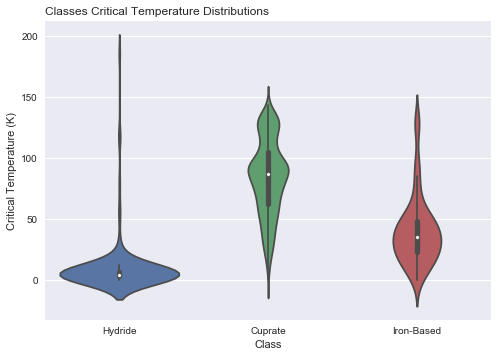

In [23]:
Box1 = sns.violinplot(x='Group', y='critical_temp', data=Classes)
plt
plt.title("Classes Critical Temperature Distributions", loc = "left")
plt.xlabel("Class")
plt.ylabel("Critical Temperature (K)")

Text(0,0.5,'Critical Temperature (K)')

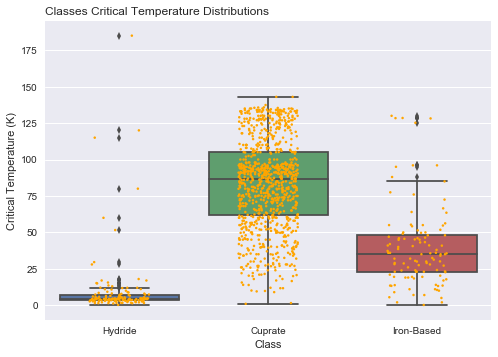

In [24]:
#Superposition of Jitter with Boxplot
Box2 =sns.boxplot(x='Group', y='critical_temp', data = Classes)
Box2 = sns.stripplot(x='Group', y = 'critical_temp', data= Classes, color = "orange", jitter = 0.2, size = 2.5) 
plt.title("Classes Critical Temperature Distributions", loc = "left")
plt.xlabel("Class")
plt.ylabel("Critical Temperature (K)")


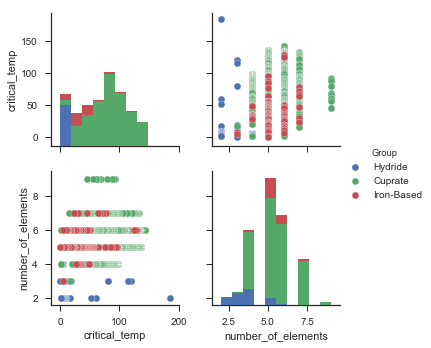

In [31]:
g = sns.pairplot(Classes, vars=["critical_temp", "number_of_elements"], hue = "Group")

In [28]:
import seaborn as sns; sns.set(style="ticks", color_codes=True, hue = "Group")
g = sns.pairplot(Classes)
g

TypeError: set() got an unexpected keyword argument 'hue'

In [ ]:
#Normalized for all classes
#features8.hist('critical_temp', bins = 16, range = (10,160), color = 'r', density=1)
#plots.title('Critical Temperature for Iron-Based,Cuprates,Hydrides-- High T Superconductors')
#plots.xlabel("Temperature (K)")
#plots.ylabel("Count")

In [231]:
import statsmodels.formula.api as smf
#Begins groundwork for setting a linear regression 
model = 'critical_temp ~ %s'%(" + ".join(Classes.columns.values[2:]))


In [232]:
#Multiple Regression Analysis on 3 combined classes 
linear_regression = smf.ols(model, data = Classes).fit()
linear_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          critical_temp   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.861e+28
Date:                Sat, 15 Dec 2018   Prob (F-statistic):               0.00
Time:                        19:05:10   Log-Likelihood:                 30177.
No. Observations:                1204   AIC:                        -6.033e+04
Df Residuals:                    1193   BIC:                        -6.028e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                     -4.405e-13   6.14e-12     -0.072      0.943   -1.25e-11    1.16e-11
critical_temp                     1.0000   3.09e-15   3.23e+14      0.000       1.000       1.000
number_of_elements             -1.61e-14   9.35e-14     -0.172      0.863      -2e-13    1.67e-13
wtd_gmean_atomic_mass          5.274e-15   1.26e-14      0.418      0.676   -1.95e-14       3e-14
wtd_gmean_fie                 -3.199e-15   3.99e-15     -0.802      0.423    -1.1e-14    4.62e-15
wtd_gmean_atomic_radius        1.055e-15   1.88e-14      0.056      0.955   -3.58e-14    3.79e-14
wtd_gmean_Density              1.695e-15   2.53e-16      6.714      0.000     1.2e-15    2.19e-15
wtd_gmean_ElectronAffinity    -4.718e-16   6.75e-15     -0.070      0.944   -1.37e-14    1.28e-14
wtd_gmean_FusionHeat          -5.829e-16   2.22e-14     -0.026      0.979   -4.42e-14     4.3e-14
wtd_gmean_ThermalConductivity -1.041e-17   9.63e-15     -0.001      0.999   -1.89e-14    1.89e-14
wtd_gmean_Valence              4.885e-15   3.85e-13      0.013      0.990   -7.51e-13     7.6e-13
==============================================================================
Omnibus:                      688.365   Durbin-Watson:                   0.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6311.668
Skew:                          -2.526   Prob(JB):                         0.00
Kurtosis:                      13.014   Cond. No.                     8.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
import statsmodels.formula.api as smf
#Begins groundwork for setting a linear regression 
model = 'critical_temp ~ %s'%(" + ".join(Hydrides.columns.values[2:]))


In [273]:
#Train Test on Combined Classes
#X contains predictors 
X1 = Classes.drop(['Group','material_name','critical_temp'],1)
X1.head()

,number_of_elements,wtd_gmean_atomic_mass,wtd_gmean_fie,wtd_gmean_atomic_radius,wtd_gmean_Density,wtd_gmean_ElectronAffinity,wtd_gmean_FusionHeat,wtd_gmean_ThermalConductivity,wtd_gmean_Valence
0,2,3.193745,1197.631481,62.520676,2.511454,103.613790,0.813651,0.188323,1.817121
164,3,14.998131,1179.732083,64.671268,5.503734,111.484165,0.734433,0.224967,2.168944
190,3,12.618189,1091.401692,67.810310,1962.792703,158.992903,84.751154,91.226388,3.956128
558,3,12.153703,1096.160884,67.268397,1428.919880,159.523281,82.456538,80.905169,3.956128
745,2,3.193745,1197.631481,62.520676,2.511454,103.613790,0.813651,0.188323,1.817121


In [274]:
#Make Y a true column vector containing the mpg for each superconductor
Y1 = Classes[['critical_temp']]

#Removed Material_names because they are not statistical predictors
#, rather just labels 

Z1 = Classes[['Group', 'material_name']]
from sklearn.model_selection import train_test_split
# Split X and y into X_

#test size = 0.66 to match previous literature
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.66, random_state=1)

In [275]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lineReg = LinearRegression()
lineReg.fit(X1_train, Y1_train)
lineReg.score(X1_test, Y1_test)

#Recent Literature had 74% for full data set. I matched this as well
#priro to splitting up by class
#See how reducing to single classes affects correlation

0.40257707428911227

In [ ]:
#Train Test on HYDRIDES


In [276]:
#X2 contains predictors 
X2 = Hydrides.drop(['Group','material_name','critical_temp'],1)
len(X2)

145

In [277]:
#Make Y2 a true column vector containing the mpg for each superconductor
Y2 = Hydrides[['critical_temp']]

#Removed Material_names because they are not statistical predictors
#, rather just labels 

Z2 = Hydrides[['Group', 'material_name']]
from sklearn.model_selection import train_test_split
# Split X and y into X_

#test size = 0.66 to match previous literature
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.66, random_state=1)


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lineReg = LinearRegression()
lineReg.fit(X2_train, Y2_train)
lineReg.score(X2_test, Y2_test)


NameError: name 'X2_train' is not defined

In [33]:
#Test Cuprates Variable-3

In [34]:
#X2 contains predictors 
X3 = Cuprates.drop(['Group','material_name','critical_temp'],1)
Y3 = Cuprates[['critical_temp']]
Z3 = Cuprates[['Group', 'material_name']]
from sklearn.model_selection import train_test_split
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.66, random_state=1)


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lineReg = LinearRegression()
lineReg.fit(X3_train, Y3_train)
abs(lineReg.score(X3_test, Y3_test))


0.31051254774400894

In [36]:
#Test Fe-Based Variable - 4

In [37]:
#X4 contains predictors 
X4 = Iron_Based.drop(['Group','material_name','critical_temp'],1)
Y4 = Iron_Based[['critical_temp']]
Z4 = Iron_Based[['Group', 'material_name']]
from sklearn.model_selection import train_test_split
X4_train, X4_test, Y4_train, Y4_test = train_test_split(X4, Y4, test_size=0.66, random_state=1)


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lineReg = LinearRegression()
lineReg.fit(X4_train, Y4_train)
abs(lineReg.score(X4_test, Y4_test))


0.2717792138548082

In [39]:
Groups = ['Hydrides', 'Cuprates', 'Iron-Based']
Number_Entries =[len(Hydrides),len(Cuprates),len(Iron_Based)]
MR_Scores = [-0.78, 0.31, 0.27]
Summary = pd.DataFrame({'Class': Groups,
                     'Number of Materials': Number_Entries,
                     'Coeffieicent of Multiple Determination': MR_Scores,
                    })
Summary

,Class,Number of Materials,Coeffieicent of Multiple Determination
0,Hydrides,145,-0.78
1,Cuprates,946,0.31
2,Iron-Based,113,0.27


In [40]:
sns.lmplot(x='Number of Materials', y='MR_Scores', data=Summary)
plt.ylim(-1,1)
plt.xlim(0,1000)

KeyError: "['MR_Scores'] not in index"